<a href="https://colab.research.google.com/github/ayush9304/CreditCardDefaultPrediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name  -  Credit Card Default Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**   - Ayush Kumar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[https://github.com/ayush9304/CreditCardDefaultPrediction](https://github.com/ayush9304/CreditCardDefaultPrediction)

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [101]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

import scipy
from statsmodels.stats.proportion import proportions_ztest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

!pip install shap==0.40.0
import shap 
import graphviz

import pickle

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [2]:
# Loading dataset from excel file
dataset = pd.read_excel("https://github.com/ayush9304/CreditCardDefaultPrediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true", header=1)

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(30000, 25)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

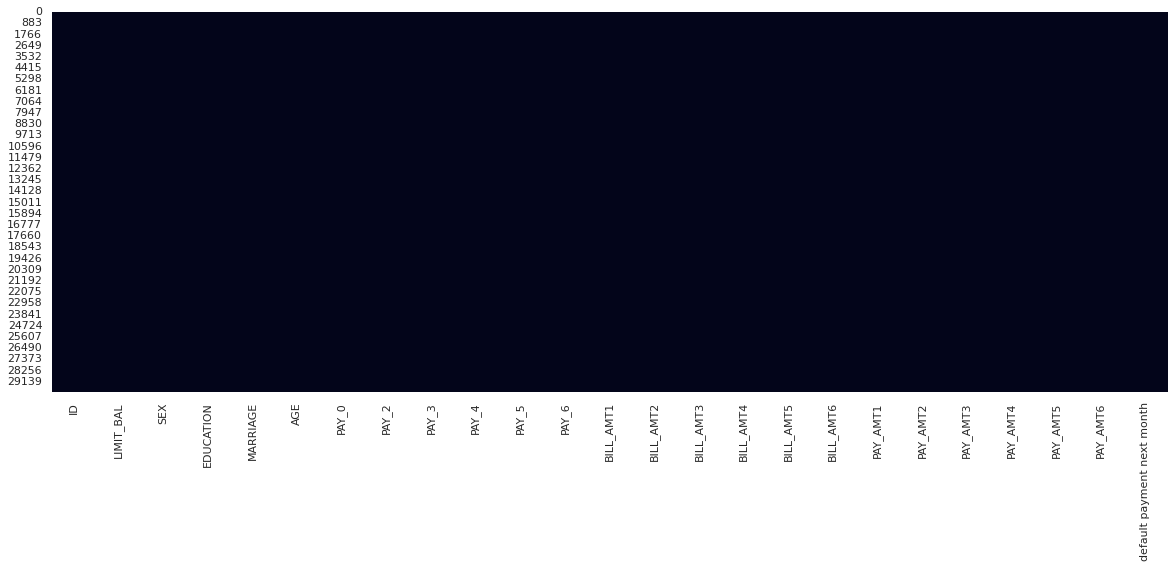

In [9]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan.

It has 30000 rows and 25 columns in the dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0 - PAY_6**: History of past 6 month payments (-2: Balance paid in full and no transactions made in the month, -1: Payment made on time, 0: The use of revolving credit, 1: Payment delay for one month, 2: Payment delay for two months, 3: Payment delay for three months, ... 8: Payment delay for eight months, 9=payment delay for nine months and above).
* **BILL_AMT1 - BILL_AMT6**: Amount of bill statements for past 6 months.
* **PAY_AMT1 - PAY_AMT6**: Amount of previous payments for past 6 months.
* **default payment next month**: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## 3. ***Data Wrangling***

### Data Wrangling Code

I see that in history of past payments columns (PAY_0 to PAY_6), there is no PAY_1 column, on the other hand other columns describing past payments like past payment bills (BILL_AMT1 to BILL_AMT6) and past payment amount (PAY_AMT1 to PAY_AMT6), they are for past 6 months numbered from 1 to 6. So renaming PAY_0 to PAY_1 to make data more sensible.

In [197]:
# Rename PAY_0 to PAY_1
dataset.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [202]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()

In [203]:
# Rename default payment next month to isDefault for convenience
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)

In [204]:
# Columns names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [205]:
# Unique values and their counts of SEX feature
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [206]:
# Unique values and their counts of EDUCATION feature
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [207]:
# Unique values and their counts of MARRIAGE feature
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In marriage column, 0 values are not known and they are very small in number. So will combine these values in others category

In [208]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0: "Others"})

In [209]:
# Unique values and their counts of DEFAULT feature
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [210]:
# Replacing numerical values of categorical variables to appropriate labels for better visualizations
# In feature engineering I'll apply categorical encoding to these features
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 0 : 'Others', 4: 'Others', 5: 'Others', 6: 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
# df.replace({'DEFAULT' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [211]:
# Description of Age
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [212]:
# Creating new feature avg_credit_utilization_ratio
total_outstanding_balance = df.loc[:, 'BILL_AMT1':'BILL_AMT6'].sum(axis=1)
total_credit_limit = df['LIMIT_BAL'] * 6
df['avg_credit_utilization_ratio'] = total_outstanding_balance / total_credit_limit
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.064200
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.023718
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.188246
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.771113
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.364463


In [213]:
# Creating new feature late_payment_count
# Create a list of payment status columns
payment_status_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Calculate the number of late payments for each user
df['late_payment_count'] = df[payment_status_cols].apply(lambda x: (x > 0).sum(), axis=1)

In [214]:
#function to get numerical and categorical columns
def get_grouped_column(df):
  numerical_columns=[]
  for col in df.columns:
    if df[col].nunique()>15:
      numerical_columns.append(col)
  categorical_columns=list(set(df.columns)-set(numerical_columns))

  return categorical_columns ,numerical_columns

In [215]:
categorical_columns, numerical_columns = get_grouped_column(df)
print("Categorical:",categorical_columns)
print("Numerical:",numerical_columns)

Categorical: ['SEX', 'PAY_3', 'EDUCATION', 'late_payment_count', 'PAY_6', 'DEFAULT', 'MARRIAGE', 'PAY_4', 'PAY_5', 'PAY_1', 'PAY_2']
Numerical: ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'avg_credit_utilization_ratio']


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar chart & Pie Chart on Default

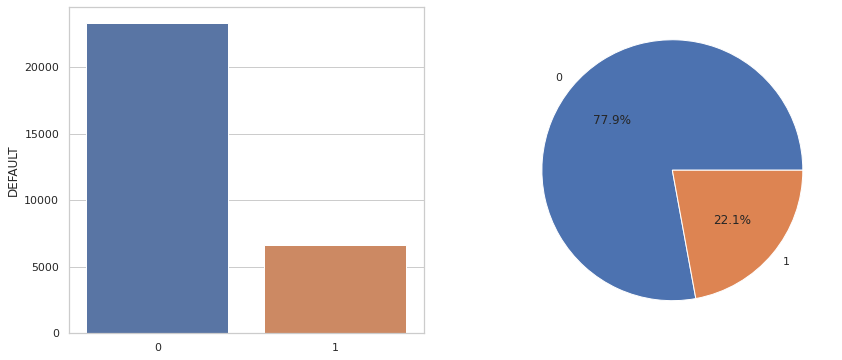

In [28]:
d = df['DEFAULT'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=d.index, y=d)

plt.subplot(1,2,2)
p = plt.pie(d, labels=d.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

To check proportions of Defaulters among all the clients.

##### 2. What is/are the insight(s) found from the chart?

Around 22% clients gets defaulted. Also it is an imbalanced dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Bar chart & Pie chart of Default by sex

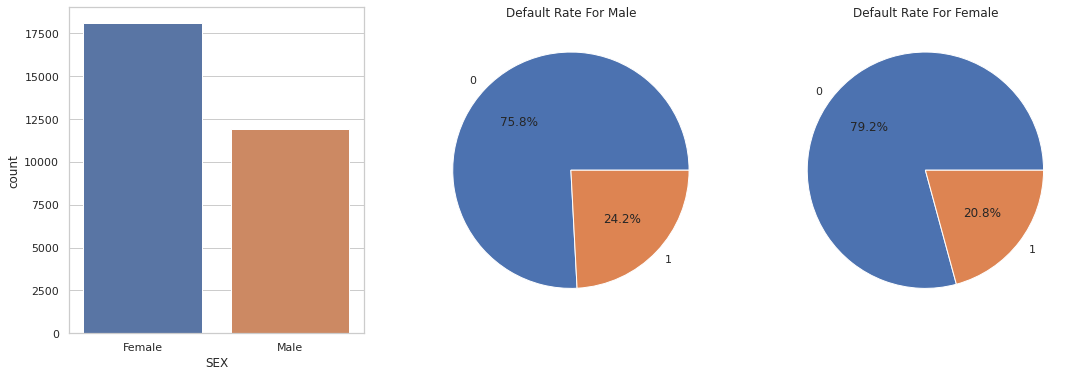

In [29]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='SEX', data=df)

d = df.groupby(['SEX', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(1,3,2)
plt.title("Default Rate For Male")
p = plt.pie(d.Male, labels=d.Male.index, autopct="%.1f%%")

plt.subplot(1,3,3)
plt.title("Default Rate For Female")
p = plt.pie(d.Female, labels=d.Female.index, autopct="%.1f%%")

In [30]:
df.groupby(['SEX', 'DEFAULT'])['DEFAULT'].count().Male

DEFAULT
0    9015
1    2873
Name: DEFAULT, dtype: int64

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of males and females.

Pie Chart: To get proportion of defaults for each sex.

##### 2. What is/are the insight(s) found from the chart?

There are more women than men in our dataset and apparently, men have a slightly higher rate of default compared to female.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Bar chart & Pie chart for default by education

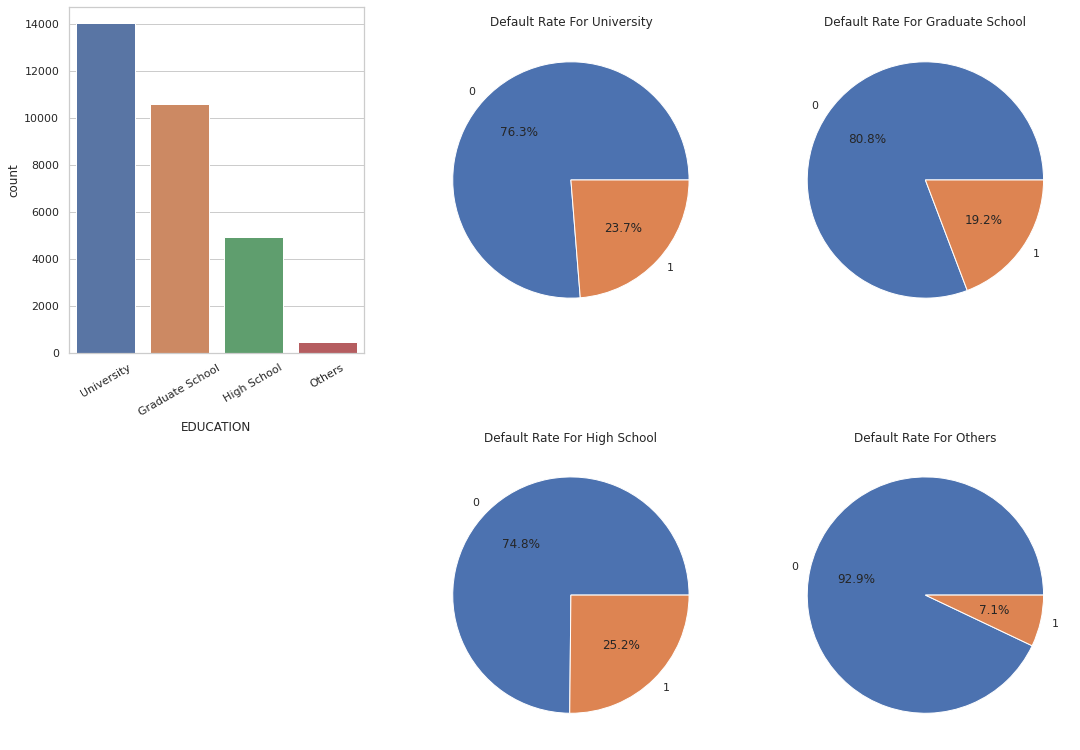

In [31]:
plt.figure(figsize=(18,14))
plt.subplot(2,3,1)
sns.countplot(x='EDUCATION', data=df)
p = plt.xticks(rotation=30)

d = df.groupby(['EDUCATION', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(2,3,2)
plt.title("Default Rate For University")
p = plt.pie(d.University, labels=d.University.index, autopct="%.1f%%")

plt.subplot(2,3,3)
plt.title("Default Rate For Graduate School")
p = plt.pie(d['Graduate School'], labels=d['Graduate School'].index, autopct="%.1f%%")

plt.subplot(2,3,5)
plt.title("Default Rate For High School")
p = plt.pie(d['High School'], labels=d['High School'].index, autopct="%.1f%%")

plt.subplot(2,3,6)
plt.title("Default Rate For Others")
p = plt.pie(d.Others, labels=d.Others.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of clients by Education.

Pie Chart: To get proportion of defaults for clients by each education.

##### 2. What is/are the insight(s) found from the chart?

Default rate for High School educated clients is highest and Others category clients has lowest rate of defaults.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Bar chart & Pie chart for default by Marriage

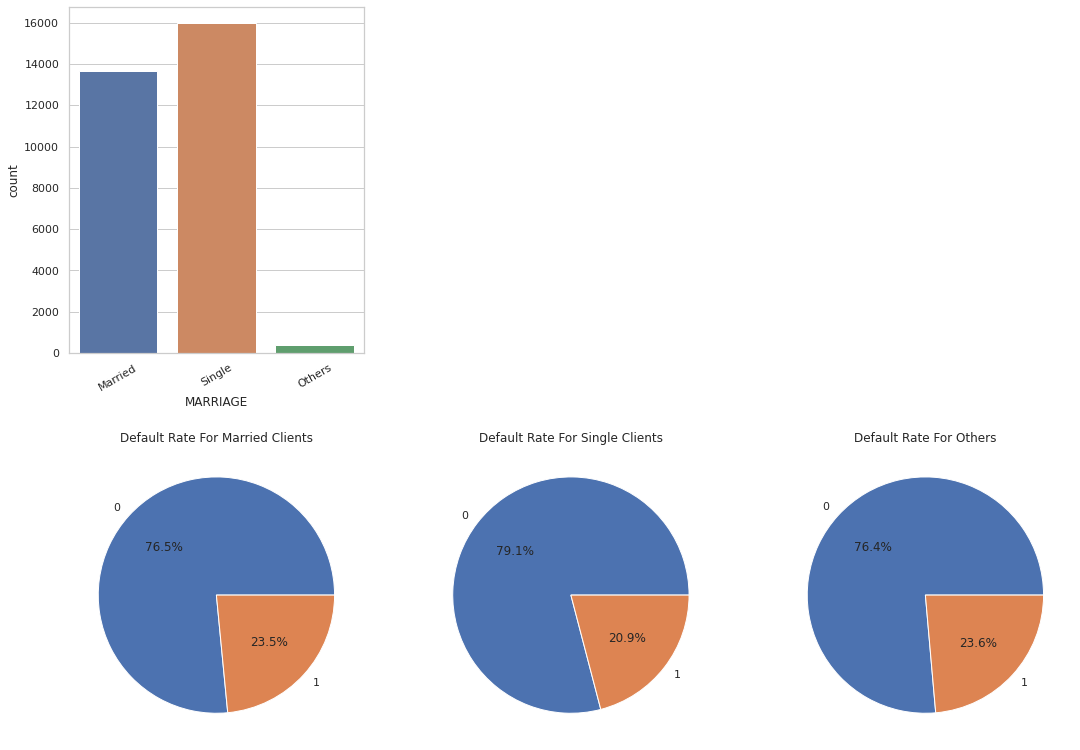

In [32]:
plt.figure(figsize=(18,14))
plt.subplot(2,3,1)
sns.countplot(x='MARRIAGE', data=df)
p = plt.xticks(rotation=30)

d = df.groupby(['MARRIAGE', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(2,3,4)
plt.title("Default Rate For Married Clients")
p = plt.pie(d['Married'], labels=d['Married'].index, autopct="%.1f%%")

plt.subplot(2,3,5)
plt.title("Default Rate For Single Clients")
p = plt.pie(d['Single'], labels=d['Single'].index, autopct="%.1f%%")

plt.subplot(2,3,6)
plt.title("Default Rate For Others")
p = plt.pie(d.Others, labels=d.Others.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of clients by Marriage.

Pie Chart: To get proportion of defaults for clients by each marriage.

##### 2. What is/are the insight(s) found from the chart?

Most people fall under Married and Single category with singles being highest.

The default rate in all the categories is almost same with in Others and Married clients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='AGE', ylabel='Count'>

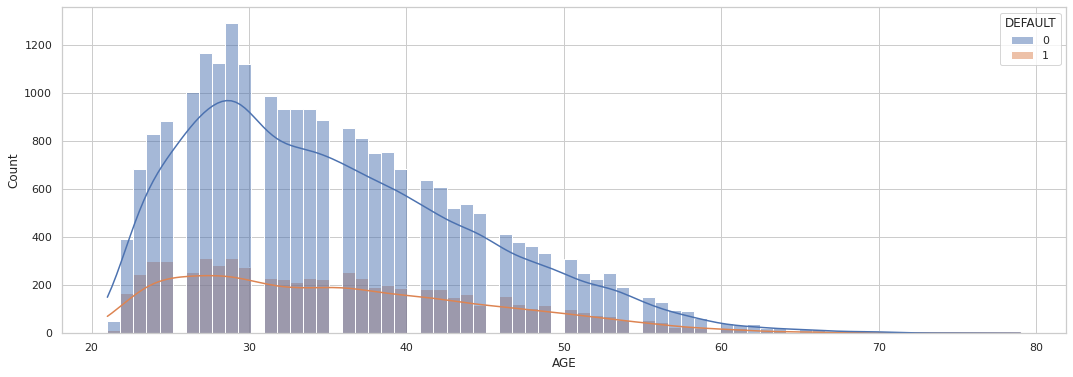

In [33]:
plt.figure(figsize=(18,6))
sns.histplot(x='AGE', data=df, hue='DEFAULT',kde=True)

##### 1. Why did you pick the specific chart?

To compare numbers of clients by age.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Bar Plot for default rate by age group

Text(0, 0.5, 'Default Rate')

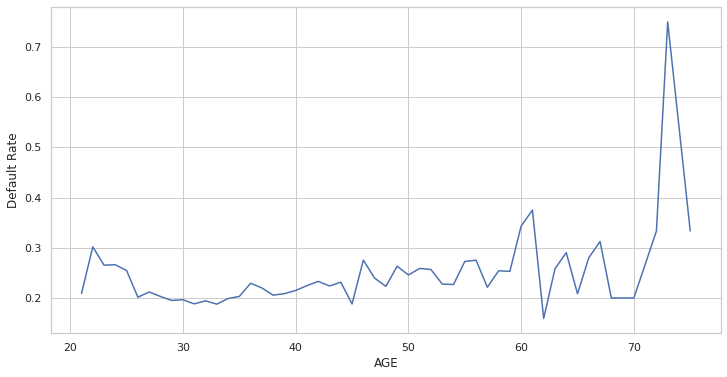

In [34]:
plt.figure(figsize=(12,6))
df.groupby('AGE')['DEFAULT'].value_counts(normalize = True)[:, 1].plot()
plt.ylabel("Default Rate")

##### 1. Why did you pick the specific chart?

To visualize how default rate varies by age.

##### 2. What is/are the insight(s) found from the chart?

The lowest default rate are in middle aged clients, while the highest default rates occur with young clients and old clients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Distribution of LIMIT_BAL

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

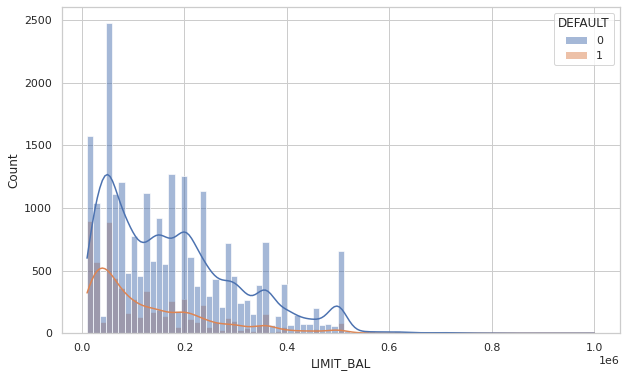

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(x='LIMIT_BAL', hue='DEFAULT', data=df, kde=True)

##### 1. Why did you pick the specific chart?

Histogram to visualize distribution of LIMIT_BAL.

##### 2. What is/are the insight(s) found from the chart?

As expected, the distribution is right skewed and most customers have 200k or less of credit limit and more customers going default on that range.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Histogram of avg_credit_utilization_rate

<Axes: xlabel='avg_credit_utilization_ratio', ylabel='Count'>

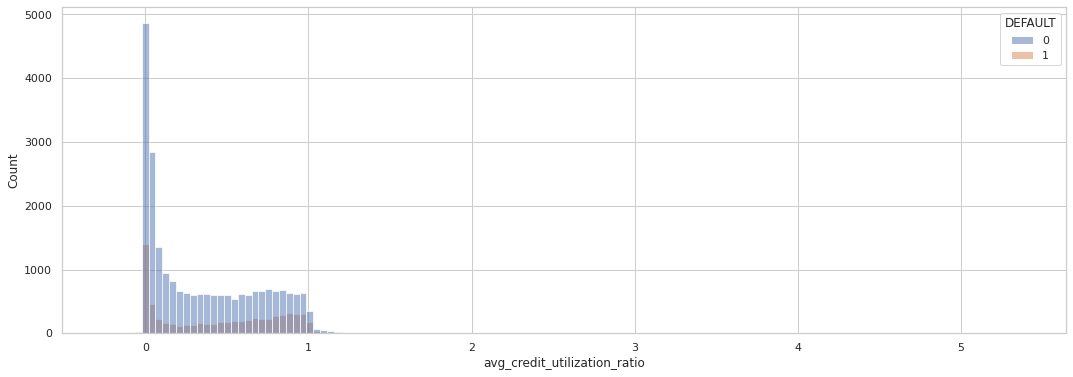

In [36]:
plt.figure(figsize=(18,6))
sns.histplot(x='avg_credit_utilization_ratio', data=df, hue='DEFAULT')

##### 1. Why did you pick the specific chart?

To visualize distribution of average credit utilization ratio

##### 2. What is/are the insight(s) found from the chart?

As the credit utilization rate increases, the rate of defaults also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Bar chart default rate for different bill amount groups

In [37]:
def get_bill_amt_bins(df):
  df2 = df.copy()

  bill_amtx = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
  bill_amtx_bins = ['BILL_AMT1_BIN', 'BILL_AMT2_BIN', 'BILL_AMT3_BIN', 'BILL_AMT4_BIN', 'BILL_AMT5_BIN', 'BILL_AMT6_BIN']

  for i, col in enumerate (bill_amtx_bins):
      df2[col] = pd.cut(df2[bill_amtx[i]],[-350000, -1, 0, 25000, 75000, 200000, 2000000])
  
  return df2, bill_amtx_bins

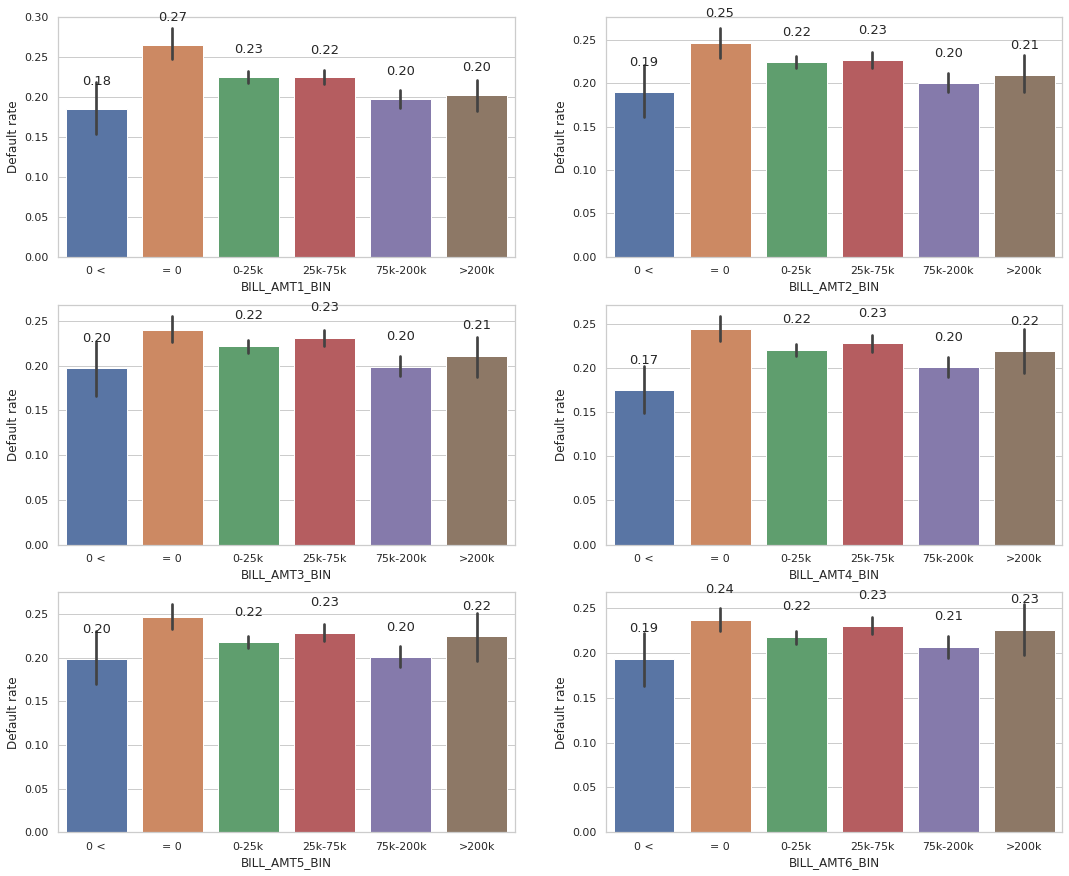

In [38]:
plt.figure(figsize=(18,15))
df2, bins = get_bill_amt_bins(df)
for i,col in enumerate(bins):
    plt.subplot(3, 2, i+1)
    ax = sns.barplot(x = df2[col], y = df2['DEFAULT'])
    plt.ylabel("Default rate")
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'])
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

As expected, those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a bill in the previous months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Bar plot default rate by late payment count

Text(0, 0.5, 'Default Rate')

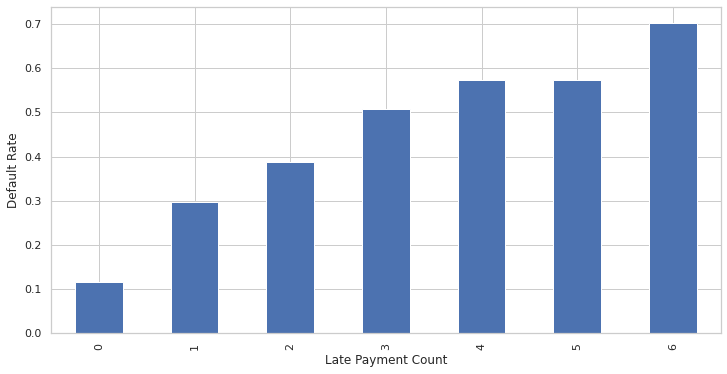

In [39]:
default_rate = df.groupby('late_payment_count')['DEFAULT'].mean()

plt.figure(figsize=(12,6))
default_rate.plot(kind='bar')
plt.xlabel('Late Payment Count')
plt.ylabel('Default Rate')

##### 1. Why did you pick the specific chart?

Bar plot to plot rate of default for different late payment count

##### 2. What is/are the insight(s) found from the chart?

As late payment count increases, chances of default increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [40]:
def get_pay_amt_bins(df):
  df2 = df.copy()

  pay_amtx = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
  pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

  for i, col in enumerate (pay_amtx_bins):
      df2[col] = pd.cut(df[pay_amtx[i]],[-1, 0, 25000, 50000, 100000, 2000000])
  
  return df2, pay_amtx_bins

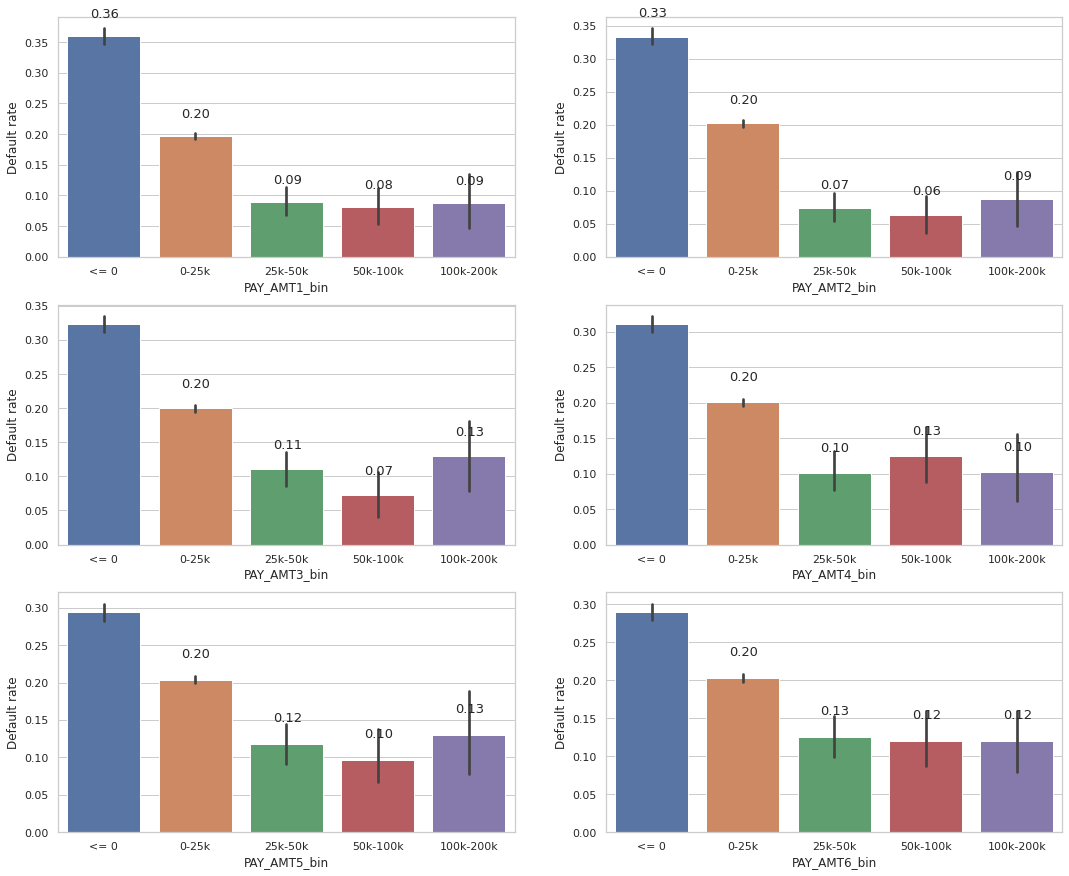

In [41]:
plt.figure(figsize=(18,15))
df2, bins = get_pay_amt_bins(df)
for i,col in enumerate(bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "DEFAULT", data = df2)
    plt.ylabel("Default rate")
    plt.xticks([0,1,2,3,4],['<= 0', '0-25k', '25k-50k', '50k-100k', '100k-200k'])
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Default rate is higher among those who paid nothing in previous months and lower rates among those paid over 25k.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='LIMIT_BAL', ylabel='MARRIAGE'>

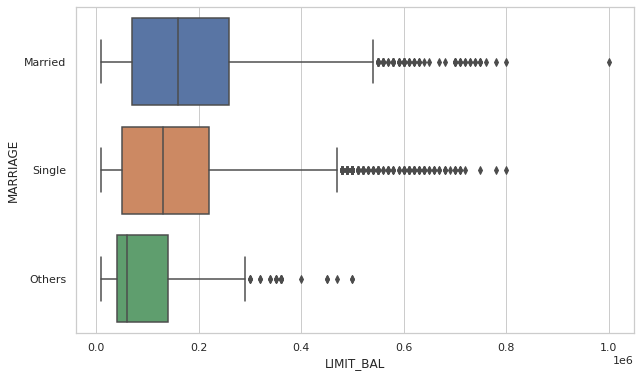

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LIMIT_BAL', y='MARRIAGE', data=df)

##### 1. Why did you pick the specific chart?

To understand if there are any differences in credit limits across marital statuses.

##### 2. What is/are the insight(s) found from the chart?

The median and upper quartile of **LIMIT_BAL** are higher for married individuals compared to those who are single or have other marital statuses.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

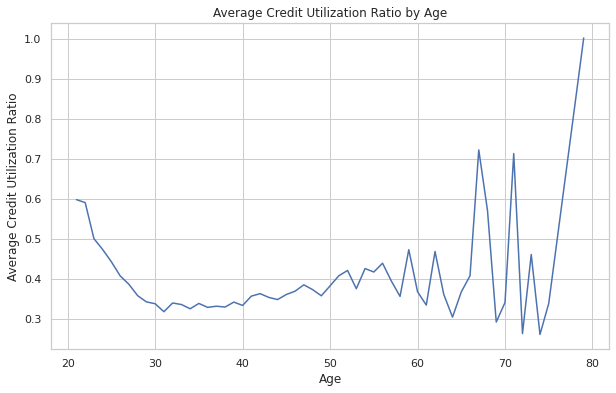

In [43]:
# group data by age and calculate average credit utilization ratio
age_grouped = df.groupby('AGE')['avg_credit_utilization_ratio'].mean()

# plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(x=age_grouped.index, y=age_grouped.values)
plt.title('Average Credit Utilization Ratio by Age')
plt.xlabel('Age')
plt.ylabel('Average Credit Utilization Ratio')
plt.show()


##### 1. Why did you pick the specific chart?

To show the trend of average credit utilization ratio across different ages.

##### 2. What is/are the insight(s) found from the chart?

The average credit utilization ratio is higher among younger individuals (below 25) and older individuals (above 55).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

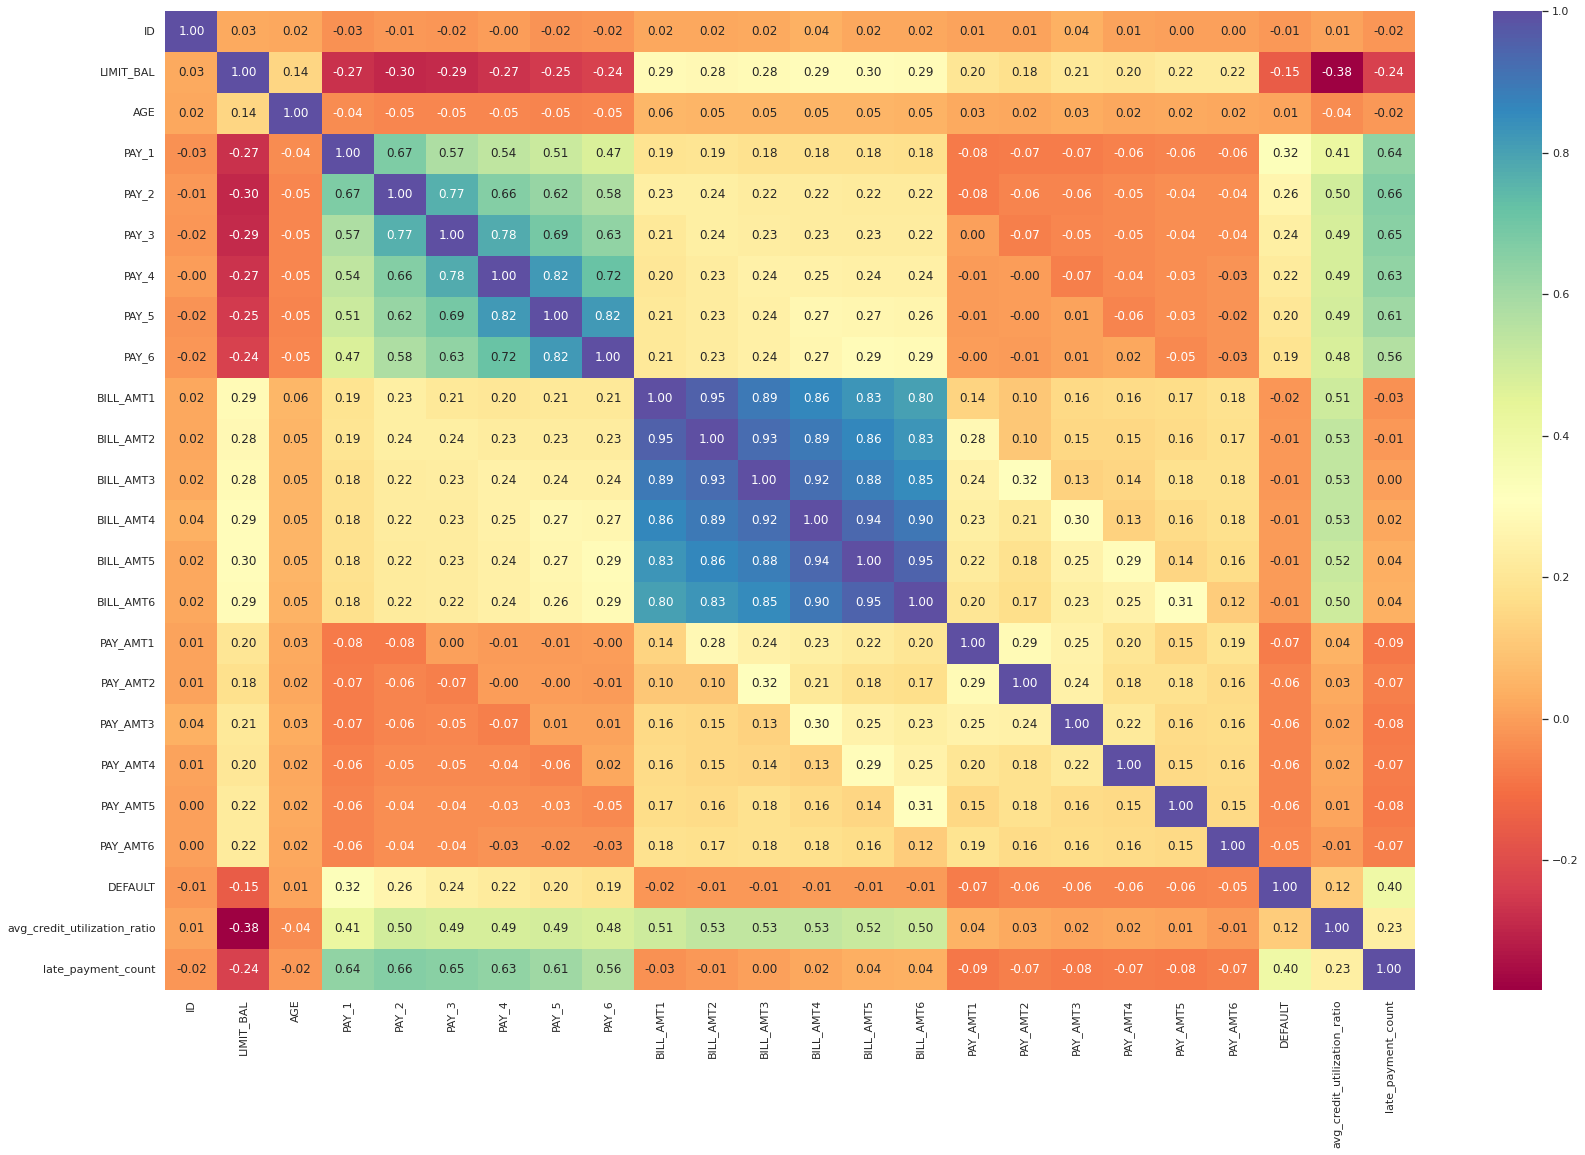

In [44]:
corr = df.corr()
f, ax = plt.subplots(figsize=(28, 18))
sns.heatmap(corr, annot = True, fmt='.2f', cmap="Spectral")

##### 1. Why did you pick the specific chart?

To check the correlation between each features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - SEX vs LIMIT_BAL

<Axes: xlabel='LIMIT_BAL', ylabel='SEX'>

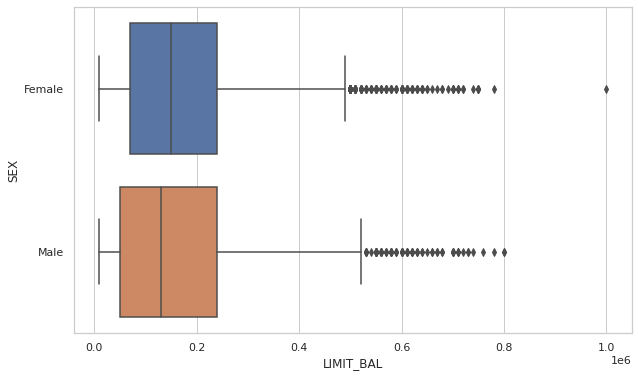

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LIMIT_BAL', y='SEX', data=df)

##### 1. Why did you pick the specific chart?

To see if there are any gender-based differences in credit limits.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Females are less likely to default on their payments compared to Males.
2. The average credit limit for defaulters is lower than the average credit limit for non-defaulters.
3. 

### Hypothetical Statement - 1

Females are less likely to default on their payments compared to Males.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The proportion of defaulters is the same for males and females.

**Alternative Hypothesis:** The proportion of defaulters is lower for females than for males.

**Test Type:** two-sample z-test for proportions

#### 2. Perform an appropriate statistical test.

In [216]:
# Create two groups based on sex
male_defaults = df[(df['SEX'] == 'Male') & (df['DEFAULT'] == 1)]
female_defaults = df[(df['SEX'] == 'Female') & (df['DEFAULT'] == 1)]

# Calculate the proportions of defaulters in each group
male_proportion = len(male_defaults) / len(df[df['SEX'] == 'Male'])
female_proportion = len(female_defaults) / len(df[df['SEX'] == 'Female'])

# Perform the test for the difference in proportions
z_score, p_value = proportions_ztest([len(female_defaults), len(male_defaults)], 
                                           [len(df[df['SEX'] == 'Female']), len(df[df['SEX'] == 'Male'])], 
                                           alternative='smaller')

# Print the results
print("Male default rate:", round(male_proportion, 4))
print("Female default rate:", round(female_proportion, 4))
print("Z-score:", z_score)
print("P-value:", p_value)
print()
if p_value < 0.05:
  print(f"Since p-value ({p_value}) is less than 0.05, we reject null hypothesis.\nHence, The proportion of defaulters is lower for females than for males.")
else:
  print(f"Since p-value ({p_value}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The proportion of defaulters is the same for males and females.")


Male default rate: 0.2417
Female default rate: 0.2078
Z-score: -6.921375088562895
P-value: 2.236402167907072e-12

Since p-value (2.236402167907072e-12) is less than 0.05, we reject null hypothesis.
Hence, The proportion of defaulters is lower for females than for males.


##### Which statistical test have you done to obtain P-Value?

I have used one-tailed two-sample z-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the proportion of defaulters is lower for females than for males.

##### Why did you choose the specific statistical test?

The two-sample z-test for proportions is used to determine whether the proportion of a certain outcome (in this case, default payment) differs significantly between two groups (in this case, males and females).
The one-tailed aspect of the test indicates that we are only interested in the direction of the difference (whether females have a lower proportion of defaulters than males) and not the magnitude of the difference.

### Hypothetical Statement - 2

The average credit limit for defaulters is lower than the average credit limit for non-defaulters.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** The average credit limit for defaulters is equal to the average credit limit for non-defaulters.

**Alternative hypothesis:** The average credit limit for defaulters is lower than the average credit limit for non-defaulters.

**Test Type:** Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [217]:
# Split the data into defaulters and non-defaulters
defaulters = df[df['DEFAULT'] == 1]
non_defaulters = df[df['DEFAULT'] == 0]

# Calculating the mean credit limit for defaulters and non-defaulters
mean_credit_limit_defaulters = defaulters['LIMIT_BAL'].mean()
mean_credit_limit_non_defaulters = non_defaulters['LIMIT_BAL'].mean()

# Calculating the standard deviation of credit limit for defaulters and non-defaulters
std_credit_limit_defaulters = defaulters['LIMIT_BAL'].std()
std_credit_limit_non_defaulters = non_defaulters['LIMIT_BAL'].std()

# Calculate the sample sizes for defaulters and non-defaulters
n_defaulters = len(defaulters)
n_non_defaulters = len(non_defaulters)

# Calculate the standard error of the mean difference
se_mean_difference = ((std_credit_limit_defaulters ** 2 / n_defaulters) + (std_credit_limit_non_defaulters ** 2 / n_non_defaulters)) ** 0.5

# Calculate the t-statistic and p-value using the two-sample t-test
t_stat, p_value = scipy.stats.ttest_ind(defaulters['LIMIT_BAL'], non_defaulters['LIMIT_BAL'], equal_var=False)

# Print the results
print('Mean credit limit for defaulters:', mean_credit_limit_defaulters)
print('Mean credit limit for non-defaulters:', mean_credit_limit_non_defaulters)
print('t-statistic:', t_stat)
print('p-value:', p_value)
print()
if p_value < 0.05:
  print(f"Since p-value ({p_value}) is less than 0.05, we reject null hypothesis.\nHence, The average credit limit for defaulters is lower than the average credit limit for non-defaulters.")
else:
  print(f"Since p-value ({p_value}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The average credit limit for defaulters is equal to the average credit limit for non-defaulters.")


Mean credit limit for defaulters: 130109.65641952984
Mean credit limit for non-defaulters: 178099.72607430234
t-statistic: -28.951587933509845
p-value: 3.364100245511469e-178

Since p-value (3.364100245511469e-178) is less than 0.05, we reject null hypothesis.
Hence, The average credit limit for defaulters is lower than the average credit limit for non-defaulters.


##### Which statistical test have you done to obtain P-Value?

I have used two-sample t-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the average credit limit for defaulters is lower than the average credit limit for non-defaulters.

##### Why did you choose the specific statistical test?

The two-sample t-test is used to statistical test for comparing means and is appropriate when the assumptions of normality although if sample sizes is large (6636 and 23364 in this case) we can still use t-test.

### Hypothetical Statement - 3

The mean payment delay for defaulters is higher than the mean payment delay for non-defaulters.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The mean payment delay for defaulters is not significantly different from the mean payment delay for non-defaulters.

**Alternative Hypothesis:** The mean payment delay for defaulters is significantly higher than the mean payment delay for non-defaulters.

**Test Type:** Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [228]:
# Define defaulters and non-defaulters
defaulters = df[df['DEFAULT']==1]['PAY_1']
non_defaulters = df[df['DEFAULT']==0]['PAY_1']

# Negative values in PAY_1 indicate that the payment was made on time or early, so considering them as 0 before calculating mean
defaulters = defaulters.apply(lambda x: 0 if x < 0 else x)
non_defaulters = non_defaulters.apply(lambda x: 0 if x < 0 else x)

# Perform two-sample t-test
t_stat, p_value = scipy.stats.ttest_ind(defaulters, non_defaulters)

# Print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)
print()
if p_value < 0.05:
  print(f"Since p-value ({p_value}) is less than 0.05, we reject null hypothesis.\nHence, The mean payment delay for defaulters is significantly higher than the mean payment delay for non-defaulters.")
else:
  print(f"Since p-value ({p_value}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The mean payment delay for defaulters is not significantly different from the mean payment delay for non-defaulters.")


t-statistic: 74.69733236216236
p-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, The mean payment delay for defaulters is significantly higher than the mean payment delay for non-defaulters.


##### Which statistical test have you done to obtain P-Value?

I have used two-sample t-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the mean payment delay for defaulters is significantly higher than the mean payment delay for non-defaulters.

##### Why did you choose the specific statistical test?

The two-sample t-test is used to statistical test for comparing means and is appropriate when the assumptions of normality although if sample sizes is large (6636 and 23364 in this case) we can still use t-test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Checking missing values
print("Total missing Values:", df.isna().sum().sum())

Total missing Values: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [48]:
def draw_histograms(df, columns, bins=50):
    fig=plt.figure(figsize=(18,25))
    for i, col in enumerate(columns):
      plt.subplot(10, 4, i+1)
      sns.histplot(df[col], kde=True, bins=bins)
      plt.title(col)
    fig.tight_layout()

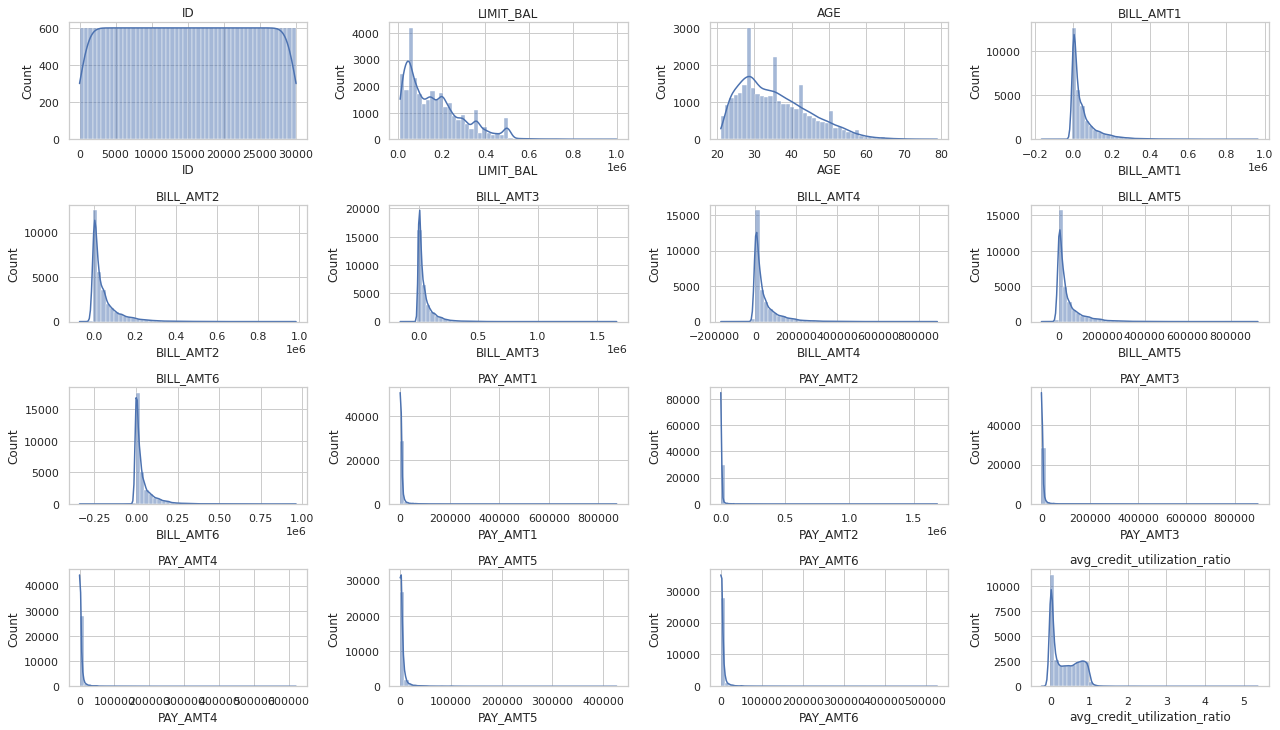

In [49]:
draw_histograms(df, numerical_columns)

We can see that most of the numerical columns are right skewed.

Also *late_payment_count* have 6 values with 0 being majority and we can't treat high values (5 or 6) as outliers as these high values increases chances of defaulting.

In [50]:
#Looking deep into cases with high values for BILL_AMT1 to study if they are genuine observations of data entry errors
df[df['BILL_AMT1'] > 400000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'DEFAULT']].head(15)

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,DEFAULT
59,400000,0,0,0,400134,398857,404205,17000,15029,30000,0
102,480000,0,0,0,422069,431342,479432,16078,55693,17000,0
360,500000,4,3,2,507726,509229,499936,10000,0,14000,1
407,500000,1,2,0,507062,491956,430637,325,15296,12137,0
451,600000,2,2,0,467150,458862,469703,0,18000,16000,1
918,240000,0,0,0,471814,478380,395612,16044,15087,12000,0
1184,460000,0,0,0,410033,385394,325663,16088,13039,11127,0
1347,630000,0,0,0,440474,444370,455286,18000,20000,12000,0
1358,390000,0,0,0,495559,248821,216051,10218,8035,7035,0
1508,480000,0,0,0,482250,475931,429037,18093,15233,12597,0


They looks like rows with very high values for BILL_AMTX also their LIMIT_BAL is very high. So they must be representing few super rich people and the data are genuine not an error. Hence they are not outliers.

Those who defaulted have significantly lower PAY_AMT compared to BILL_AMT which is expected. 

In [51]:
#Looking deep into cases with high values for PAY_AMT1 to study if they are genuine observations of data entry errors
df[df['PAY_AMT1'] > 300000][['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'DEFAULT']].head(15)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,DEFAULT
2687,368199,6486,234,500000,-2,-1,71921,367979,294969,0
5687,302000,66270,15000,480000,0,0,106660,400000,66270,0
8500,405016,0,14000,400000,-1,-1,6500,405016,391178,0
12330,505000,331,1070,300000,1,-1,-165580,324392,296931,0
25431,304815,8000,8127,170000,0,-1,30860,167941,171459,0
28003,493358,1227082,164577,510000,-1,-1,71121,481382,559712,0
28716,873552,1215471,889043,340000,-1,-1,139808,176743,34402,0
29820,423903,15100,14600,400000,1,-1,396343,394858,395716,0
29867,300039,13214,12005,340000,-1,0,44855,331641,331334,0
29963,323014,1605,349395,610000,0,-1,348392,322228,319014,0


Similarly for very high PAY_AMTX values we can see they have very high BILL_AMTX in previous months  and all payments are done duly, So they must be representing super rich people and data is genuine and not errors. Hence they are not outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are no outliers.

### 3. Categorical Encoding

In [52]:
print(categorical_columns)

['SEX', 'PAY_3', 'EDUCATION', 'late_payment_count', 'PAY_6', 'DEFAULT', 'MARRIAGE', 'PAY_4', 'PAY_5', 'PAY_1', 'PAY_2']


In [53]:
# Checking number of unique values in categorical columns
for col in categorical_columns:
  print("No. of unique values in", col, "is", df[col].nunique())

No. of unique values in SEX is 2
No. of unique values in PAY_3 is 11
No. of unique values in EDUCATION is 4
No. of unique values in late_payment_count is 7
No. of unique values in PAY_6 is 10
No. of unique values in DEFAULT is 2
No. of unique values in MARRIAGE is 3
No. of unique values in PAY_4 is 11
No. of unique values in PAY_5 is 10
No. of unique values in PAY_1 is 11
No. of unique values in PAY_2 is 11


In [54]:
# Converting SEX column into one hot encoding
df['SEX'] = df['SEX'].apply(lambda x: 1 if x=='Male' else 0)   # Male:1, Female:0

In [55]:
# Converting EDUCATION & MARRIAGE columns into one hot encoding
df = pd.get_dummies(df,columns = ["EDUCATION","MARRIAGE"])
df = df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1)

In [56]:
# Converting PAY_X columns into one hot encoding
df = pd.get_dummies(df, columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first = True)

In [57]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,avg_credit_utilization_ratio,late_payment_count,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.064200,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.023718,2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.188246,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.771113,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.364463,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [58]:
# new shape of dataframe
df.shape

(30000, 82)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

<Axes: >

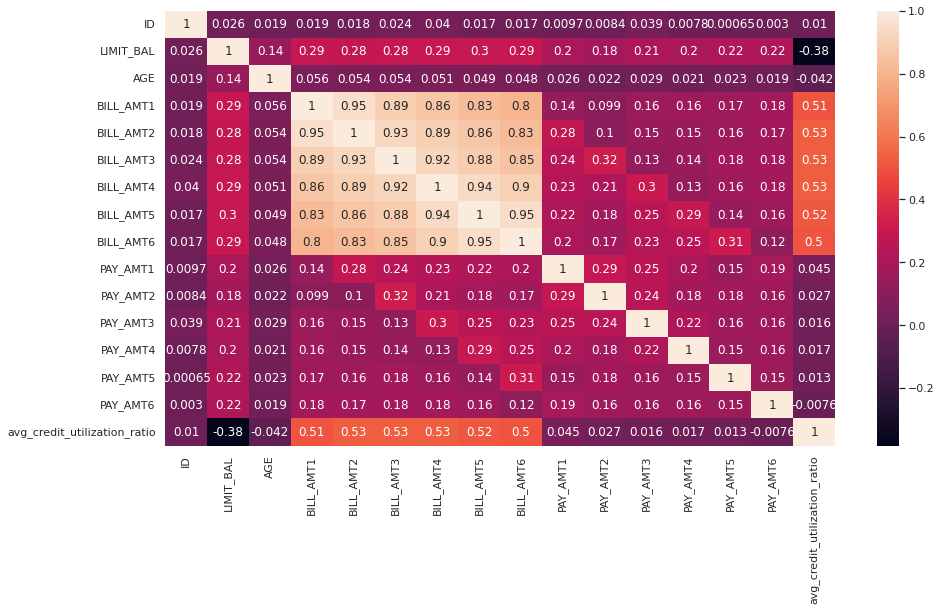

In [59]:
# Plotting correlation heatmap of numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[numerical_columns].corr(), annot=True) 

In [60]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)

In [61]:
# calculating vif factor score
calc_vif(df[numerical_columns])

,feature,VIF
4,BILL_AMT2,38.161349
7,BILL_AMT5,35.970261
5,BILL_AMT3,31.805111
6,BILL_AMT4,29.611536
8,BILL_AMT6,21.325303
3,BILL_AMT1,20.663724
2,AGE,7.065056
1,LIMIT_BAL,5.072953
15,avg_credit_utilization_ratio,4.679466
0,ID,3.591610


In [62]:
# Dropping top highly correlated columns
to_drop = ['BILL_AMT2', 'BILL_AMT5', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6']
df = df.drop(to_drop, axis=1)

In [66]:
# Updated numerical columns after dropping some correlated columns above
numerical_columns = [col for col in numerical_columns if col not in to_drop]

<Axes: >

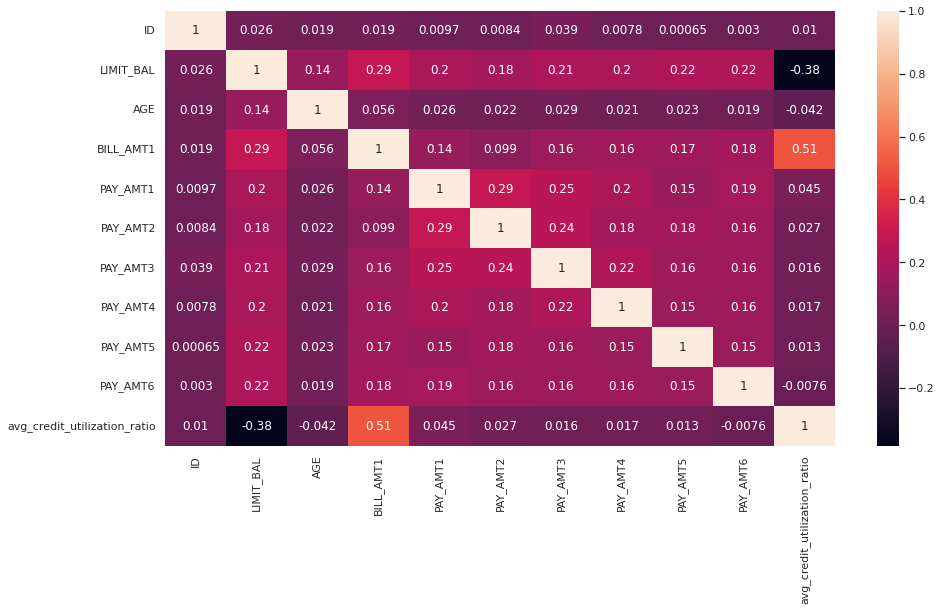

In [67]:
# New correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df[numerical_columns].corr(), annot=True)

In [69]:
# ID is not useful in determining whether a customer will default or not
df = df.drop('ID', axis = 1)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [132]:
# Class percentages
df['DEFAULT'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

In [71]:
# creating list if dependent and independent variables
independent_cols = [col for col in df.columns if col != 'DEFAULT']
target_cols = 'DEFAULT'

In [72]:
# Upsamping minority class using SMOTE method
print(f'Before Handling Imbalanced class {Counter(df[target_cols])}')

# Resampling the minority class
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(df[independent_cols], df[target_cols])

# New class distribution
print(f'After Handling Imbalanced class {Counter(y_smote)}')

Before Handling Imbalanced class Counter({0: 23364, 1: 6636})
After Handling Imbalanced class Counter({1: 23364, 0: 23364})


What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 6. Data Scaling

In [134]:
# Applying StandardScaler to normalize numerical values
scaler = StandardScaler()
X = scaler.fit_transform(X_smote)

In [146]:
# converting back dataframe to preserve feature names which will be used in model interpretation
X = pd.DataFrame(X, columns=list(X_smote.columns))

In [150]:
y = y_smote

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [151]:
# Processed Dataset shape (rows, columns)
X.shape

(46728, 75)

##### Do you think that dimensionality reduction is needed? Explain Why?

With 75 columns (independent features) and 46728 rows, and after doing all the feature engineering steps like removing multicolinearity, feature selection manupulations etc. I don't think I need dimensionality reduction here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [152]:
# Splitting data into training and testing dataset with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [154]:
# Train and test data sizes
X_train.shape, X_test.shape

((37382, 75), (9346, 75))

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Function for Confusion Matrix

In [155]:
# Function to print confusion matrix
def matrix(actual, predicted):
  labels = [0, 1]
  cm = confusion_matrix(actual, predicted)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax, fmt='d')

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [156]:
# Dictionary to store different models accuracies for comparision
model_results = {}

## ***7. ML Model Implementation***

In [157]:
# Function train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):

  """
  Function to train and evaluate model
  Parameters:
    model: model to train
    X_train: train data (independent features)
    y_train: train data (dependent variable)
    X_test: test data (independent features)
    y_test: test data (dependent variable)
  Returns:
    clf: Trained classifier/model
    test_acc: Accuracy score on test data
    test_precision: Precision score on test data
    test_recall: recall score on test data
    test_f1: f1 score on test data
    test_roc: auc_roc score on test data
  """

  # model fitting
  clf = model.fit(X_train, y_train)

  # predicting value and probability
  y_train_prob = clf.predict_proba(X_train)[:,1]
  y_test_prob = clf.predict_proba(X_test)[:,1]

  # Compute ROC curve and AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

  # Getting optimal threshold
  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]

  # predicting classes
  y_train_pred = (y_train_prob > optimal_threshold).astype(int)
  y_test_pred = (y_test_prob > optimal_threshold).astype(int)

  # calculating accuracy on train and test set
  train_acc = accuracy_score(y_train, y_train_pred)
  test_acc = accuracy_score(y_test, y_test_pred)

  print("\n")
  print("The accuracy on train data is:", train_acc)
  print("The accuracy on test data is:", test_acc)
  print("\n")

  # calculating precision and recall on the test set
  test_precision = precision_score(y_test, y_test_pred)
  print("The precision on test data is:", test_precision)

  test_recall = recall_score(y_test, y_test_pred)
  print("The recall on test data is:", test_recall)

  # calculating f1_score on the test set
  test_f1 = f1_score(y_test, y_test_pred)
  print("The F1 on test data is:", test_f1)

  # calculating roc_auc_score on the test set
  test_roc = roc_auc_score(y_test, y_test_prob)
  print("The roc auc score on test data is:", test_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(y_train, y_train_pred)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(y_test, y_test_pred)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(y_test, y_test_pred))
  print("\n")

  return clf, test_acc, test_precision, test_recall, test_f1, test_roc

In [159]:
def get_best_params(params_dict, model, X, y, cv=5, verbose=2, scoring='accuracy'):
  """
  Function for hyperparameter tuning, searches and returns best hyperparameter
  """
  grid = RandomizedSearchCV(estimator=model,
                      param_distributions= param_dict,
                      cv = cv, verbose=verbose, scoring=scoring, n_jobs=-1)
  grid.fit(X,y)
  return grid.best_params_

### ML Model - 1 - Logistic Regression

In [160]:
# Defining hyperparameter dictionary for tuning
param_dict = {'solver': ['lbfgs'],
              'penalty': ['l2'],
              'C': [1000,100, 10, 1.0, 0.1, 0.01,0.001]}


# Searching for best hyperparameter
lg_best_params = get_best_params(param_dict, model=LogisticRegression(random_state=42), X=X_train, y=y_train)
print(lg_best_params)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.


{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1000}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




The accuracy on train data is: 0.8376491359477823
The accuracy on test data is: 0.8381125615236464


The precision on test data is: 0.8963873557451079
The recall on test data is: 0.7646051786860689
The F1 on test data is: 0.8252685067559764
The roc auc score on test data is: 0.902890259889566


Confusion matrix for train set:


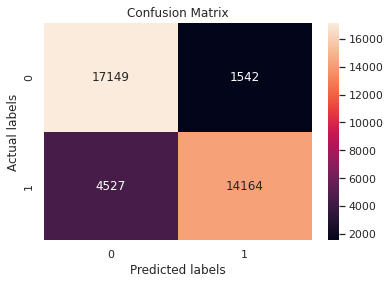

<Figure size 432x288 with 0 Axes>



Confusion matrix for test set:


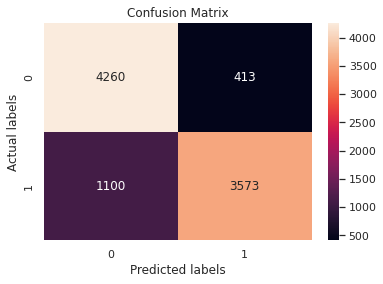

<Figure size 432x288 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      4673
           1       0.90      0.76      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.85      0.84      0.84      9346
weighted avg       0.85      0.84      0.84      9346





In [161]:
# ML Model - 1 Implementation
log_reg = LogisticRegression(solver=lg_best_params['solver'],
                             penalty=lg_best_params['penalty'],
                             C=lg_best_params['C'],
                             random_state=42)

# Fit the Algorithm
log_reg, log_acc, log_precision, log_recall, log_f1, log_roc = train_and_evaluate(log_reg, X_train, y_train, X_test, y_test)

In [165]:
# Storing results for later comparision
model_results['Logistic Regression'] = [log_acc, log_precision, log_recall, log_f1, log_roc]

Explain Model

Which hyperparameter optimization technique have you used and why?

Anser Here

Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here

### ML Model - 2 - Random Forest Classifier

In [166]:
# Defining hyperparameter dictionary for tuning
param_dict = {'n_estimators': [int(x) for x in np.linspace(50,200,4)],
              'max_depth': [int(x) for x in np.linspace(5,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)]}

# Searching for best hyperparameter
rf_best_params = get_best_params(param_dict, model=RandomForestClassifier(random_state=42), X=X_train, y=y_train)
print(rf_best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}




The accuracy on train data is: 0.8526028569899952
The accuracy on test data is: 0.833832655681575


The precision on test data is: 0.8543843707405725
The recall on test data is: 0.8048362936015407
The F1 on test data is: 0.8288705234159779
The roc auc score on test data is: 0.9054967848272072


Confusion matrix for train set:


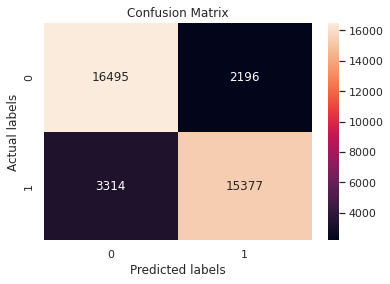

<Figure size 432x288 with 0 Axes>



Confusion matrix for test set:


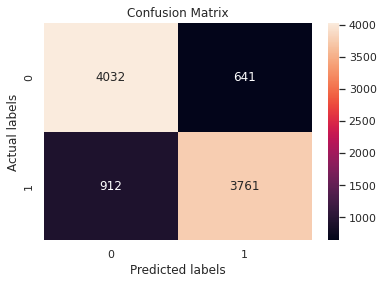

<Figure size 432x288 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4673
           1       0.85      0.80      0.83      4673

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346





In [167]:
# Modelling using best hyperparameter obtained above
rf_model =RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_split=rf_best_params['min_samples_split'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 max_depth=rf_best_params['max_depth'],
                                 random_state=42)
rf_model, rf_acc, rf_precision, rf_recall, rf_f1, rf_roc = train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)

In [168]:
# Storing results for later comparision
model_results['Random Forest'] = [rf_acc, rf_precision, rf_recall, rf_f1, rf_roc]

Explain the ML Model used and it's performance

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - XGBoost Classifier

In [169]:
# Defining hyperparameter dictionary for tuning
param_dict = {'n_estimators' : [50, 80, 100],
               'learning_rate' : [0.05, 0.10, 0.15, 0.20],
               'max_depth' : [3, 4, 5, 6, 8, 10],
               'min_child_weight' : [1, 3, 5, 7 ],
               'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4 ],
               'colsample_bytree' : [0.3, 0.4, 0.5 , 0.7]}

# Searching for best hyperparameter
xg_best_params = get_best_params(param_dict, model=XGBClassifier(random_state=42), X=X_train, y=y_train)
print(xg_best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [ ]:
# Modelling using best hyperparameter obtained above
xg_model = XGBClassifier(n_estimators=xg_best_params['n_estimators'],
                         min_child_weight=xg_best_params['min_child_weight'],
                         max_depth=xg_best_params['max_depth'],
                         learning_rate=xg_best_params['learning_rate'],
                         gamma=xg_best_params['gamma'],
                         colsample_bytree=xg_best_params['colsample_bytree'],
                         random_state=42)
xg_model, xg_acc, xg_precision, xg_recall, xg_f1, xg_roc = train_and_evaluate(xg_model, X_train, y_train, X_test, y_test)

In [ ]:
# Storing results for later comparision
model_results['XGBoost'] = [xg_acc, xg_precision, xg_recall, xg_f1, xg_roc]

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model 4 - Decision Tree Classifier

In [ ]:
# Defining hyperparameter dictionary for tuning
param_dict = {'max_depth': np.arange(1, 20),
              'min_samples_leaf': [5, 10, 20, 30, 40 ,50, 70, 100],
              'criterion': ["gini", "entropy"]}

# Searching for best hyperparameter
dt_best_params = get_best_params(param_dict, model=DecisionTreeClassifier(random_state=42), X=X_train, y=y_train)
print(dt_best_params)



The accuracy on train data is: 0.8379166443742978
The accuracy on test data is: 0.8231328910763963


The precision on test data is: 0.8984168865435356
The recall on test data is: 0.7286539696126685
The F1 on test data is: 0.8046791917759659
The roc auc score on test data is: 0.8913817735085369


Confusion matrix for train set:


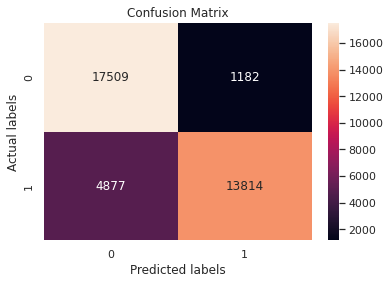

<Figure size 432x288 with 0 Axes>



Confusion matrix for test set:


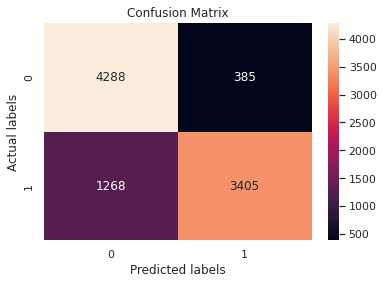

<Figure size 432x288 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      4673
           1       0.90      0.73      0.80      4673

    accuracy                           0.82      9346
   macro avg       0.84      0.82      0.82      9346
weighted avg       0.84      0.82      0.82      9346





In [173]:
# Modelling using best hyperparameter obtained above
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'], criterion=dt_best_params['criterion'], random_state=42)
dt_model, dt_acc, dt_precision, dt_recall, dt_f1, dt_roc = train_and_evaluate(dt_model, X_train, y_train, X_test, y_test)

In [174]:
# Storing results for later comparision
model_results['Decision Tree'] = [dt_acc, dt_precision, dt_recall, dt_f1, dt_roc]

Explain the ML Model used and it's performance

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The **XGBoost** model seems to be the best choice for this dataset as it has the highest score in all the metrics (Accuracy, Precision, Recall, F1 and AUC). As shown in figure table:

In [185]:
# Model performances comparision
Model_com_df = pd.DataFrame(model_results).T
Model_com_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
Model_com_df = Model_com_df.sort_values(by='F1 Score',ascending=False)
Model_com_df.style.format('{:.2f}').background_gradient(cmap='RdYlGn')

,Accuracy,Precision,Recall,F1 Score,AUC
XGBoost,0.86,0.91,0.80,0.85,0.92
Random Forest,0.83,0.85,0.80,0.83,0.91
Logistic Regression,0.84,0.90,0.76,0.83,0.90
Decision Tree,0.82,0.90,0.73,0.80,0.89


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [178]:
# Create a SHAP Explainer object
explainer = shap.Explainer(xg_model)

# Calculate SHAP values for all features
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


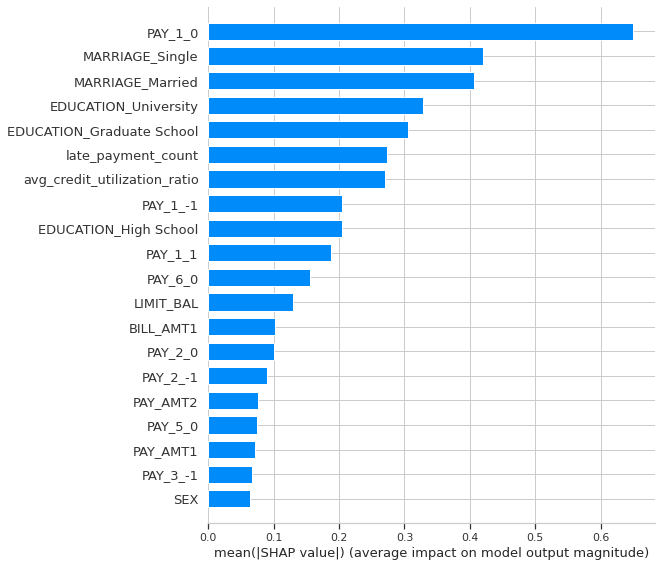

In [179]:
# Plot the feature importance using a bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

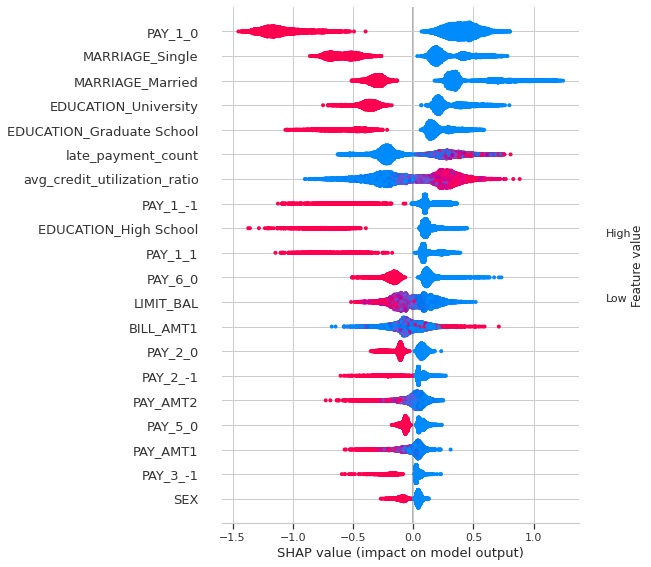

In [182]:
shap.summary_plot(shap_values, X_test)

Answer Here.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***